# Data Analysis on Successful Teams in the NBA

## Introduction

In this phase of the project, we will be making some predictions, and using data analysis methods to prove or disprove the predictions. In this portion specifically, we will be analysizing successful teams in past NBA seasons and try to find some patterns and/or similarities between the teams to see if we can find out what is necessary to be an NBA champsionship team.

Next we will build a model to find how likely current NBA teams are to win the championships this season should they make the finals.

## Finding Successful Traits

In [890]:
#Reading in datasets
import pandas as pd

df_finals = pd.read_csv("finals_games.csv")
df_curr_teams = pd.read_csv("teams.csv")
df_opponents = pd.read_csv("opponents.csv")
df_champs = pd.read_csv("nba_champs.csv")
df_runnerups = pd.read_csv("nba_runner_up.csv")
df_nba_rating = pd.read_csv('nba_rating.txt') 
df_nba_rating.drop(df_nba_rating.columns[df_nba_rating.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [891]:
print("Championship And Runner Up Finals Stats")
df_finals = df_finals.drop(columns=["Unnamed: 0"])
df_finals.head(2)

Championship And Runner Up Finals Stats


,Year,Status,Team,PTS,FG,FGA,FGP,TP,TPA,TPP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Finals_Games
0,1980,Champion,Lakers,109.5,45.000000,92.000000,48.913043,0.0,0.666667,0.000000,...,81.250000,17.166667,34.166667,51.333333,26.666667,9.166667,6.166667,20.000000,24.500000,4
1,1981,Champion,Celtics,96.5,40.166667,85.333333,47.070312,0.5,2.833333,17.647059,...,72.868217,16.666667,30.666667,47.333333,22.833333,6.666667,5.333333,16.833333,23.166667,4


In [892]:
print("Current(2019-2020) Team Stats")
df_curr_teams = df_curr_teams.drop(columns=["Unnamed: 0"])
df_curr_teams.head(2)

Current(2019-2020) Team Stats


,Team,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Status,Finals_Games
0,Dallas Mavericks,41.6,90.0,0.462,15.3,41.5,0.369,17.9,23.1,0.773,...,47.0,24.5,6.3,5.0,12.8,19.0,116.4,2020,TBD,0
1,Milwaukee Bucks,43.5,91.2,0.477,13.7,38.6,0.356,17.8,24.0,0.742,...,51.7,25.9,7.4,6.0,14.9,19.2,118.6,2020,TBD,0


In [893]:
print("Current(2019-2020) Opposing Team Stats")
df_opponents = df_opponents.drop(columns=["Unnamed: 0"])
df_opponents.head(2)

Current(2019-2020) Opposing Team Stats


,Team,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Status,Finals_Games
0,Los Angeles Lakers,39.0,87.7,0.444,11.3,33.0,0.342,17.7,22.8,0.774,...,42.3,23.2,8.2,3.7,15.7,21.4,106.9,2020,TBD,0
1,Toronto Raptors,37.9,88.5,0.429,13.0,38.5,0.337,17.7,23.0,0.768,...,46.3,25.6,7.0,5.3,16.8,20.0,106.5,2020,TBD,0


In [894]:
print("Past NBA Champs")
df_champs = df_champs.drop(columns=["Unnamed: 0"])
df_champs.head(2)

Past NBA Champs


,Year,Status,Team,PTS,FG,FGA,FGP,TP,TPA,TPP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Finals_Games
0,1980,Champion,Lakers,109.5,45.000000,92.000000,48.913043,0.0,0.666667,0.000000,...,81.250000,17.166667,34.166667,51.333333,26.666667,9.166667,6.166667,20.000000,24.500000,4
1,1981,Champion,Celtics,96.5,40.166667,85.333333,47.070312,0.5,2.833333,17.647059,...,72.868217,16.666667,30.666667,47.333333,22.833333,6.666667,5.333333,16.833333,23.166667,4


In [895]:
print("Past NBA Runner-Ups")
df_runnerups = df_runnerups.drop(columns=["Unnamed: 0"])
df_runnerups.head(2)

Past NBA Runner-Ups


,Year,Status,Team,PTS,FG,FGA,FGP,TP,TPA,TPP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Finals_Games
0,1980,Runner Up,Sixers,104.166667,43.000000,88.333333,48.679245,0.166667,2.666667,6.250000,...,75.000000,9.500000,27.666667,37.166667,31.0,9.333333,10.000000,15.166667,22.500000,2
1,1981,Runner Up,Rockets,86.666667,33.833333,89.333333,37.873134,0.500000,1.833333,27.272727,...,71.612903,18.666667,24.000000,42.666667,18.0,7.833333,5.666667,13.166667,20.166667,2


## Comparing Champions to Runner-Ups
Before we begin building a model that will try and predict how current NBA teams would do if they were in the finals, I want to try and find what stats have the biggest effect on finals outcome

In [896]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.rcParams["figure.figsize"] = [20, 10]

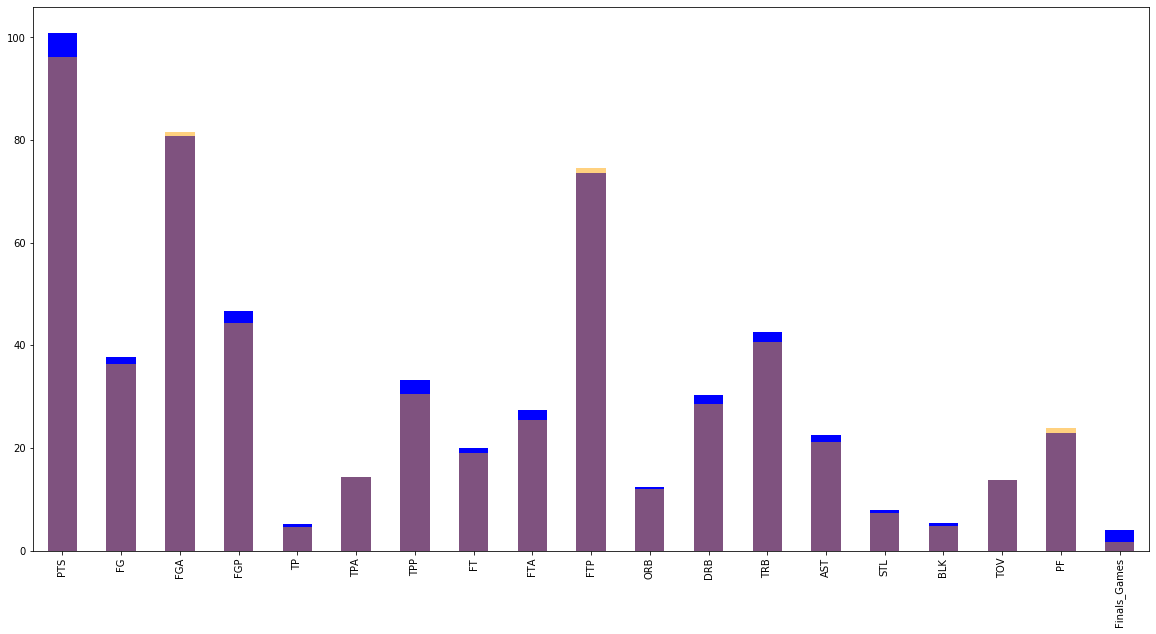

In [897]:
avg_champ = df_finals[df_finals["Status"] == "Champion"]
avg_ru = df_finals[df_finals["Status"] == "Runner Up"]

plot_avg_champ = avg_champ.drop(columns=["Year", "Status", "Team"])
plot_avg_champ = plot_avg_champ.mean()

plot_avg_ru = avg_ru.drop(columns=["Year", "Status", "Team"])
plot_avg_ru = plot_avg_ru.mean()

fig = plot_avg_champ.plot(kind = 'bar', color = 'blue')
plot_avg_ru.plot(kind = 'bar', color = 'orange', fig = fig, alpha = .5)

Before we use linear regression lets just digest what the above graph is telling us. Nearly every stat is in favor or the winning team besides 3 (Field Goal Attempts, Free Throw Percentage, Personal Fouls). Well for one FGA and PF is not a good stat to win so we'll ignore that. However surprisingly, Free throw percentage is SLIGHTLY in favor of the losing side which is an interesting stat however the overwhelmingly majority of other stats proves that we can use statistics as a measure of how likely a team is to win the finals this year.

## Predict Successful Teams of 19/20 Season

### Model 1 (Team Stats)

First we will need to make training and testing dataframes.

In [898]:
df_train = df_finals
df_train.head()

,Year,Status,Team,PTS,FG,FGA,FGP,TP,TPA,TPP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Finals_Games
0,1980,Champion,Lakers,109.500000,45.000000,92.000000,48.913043,0.000000,0.666667,0.000000,...,81.250000,17.166667,34.166667,51.333333,26.666667,9.166667,6.166667,20.000000,24.500000,4
1,1981,Champion,Celtics,96.500000,40.166667,85.333333,47.070312,0.500000,2.833333,17.647059,...,72.868217,16.666667,30.666667,47.333333,22.833333,6.666667,5.333333,16.833333,23.166667,4
2,1982,Champion,Lakers,112.333333,45.500000,91.833333,49.546279,0.166667,1.500000,11.111111,...,67.195767,18.333333,29.000000,47.333333,31.333333,10.666667,7.000000,19.333333,25.500000,4
3,1983,Champion,Sixers,110.500000,43.000000,88.500000,48.587571,0.000000,0.750000,0.000000,...,71.014493,18.000000,30.000000,48.000000,26.000000,11.000000,8.000000,17.000000,22.250000,4
4,1984,Champion,Celtics,116.000000,42.000000,92.857143,45.230769,1.285714,3.285714,39.130435,...,79.629630,17.428571,30.000000,47.428571,24.142857,9.857143,4.571429,15.857143,28.142857,4


In [899]:
df_test = df_curr_teams
df_test.head()

,Team,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Status,Finals_Games
0,Dallas Mavericks,41.6,90.0,0.462,15.3,41.5,0.369,17.9,23.1,0.773,...,47.0,24.5,6.3,5.0,12.8,19.0,116.4,2020,TBD,0
1,Milwaukee Bucks,43.5,91.2,0.477,13.7,38.6,0.356,17.8,24.0,0.742,...,51.7,25.9,7.4,6.0,14.9,19.2,118.6,2020,TBD,0
2,Houston Rockets,41.1,90.7,0.454,15.4,44.3,0.348,20.5,26.0,0.787,...,44.9,21.5,8.5,5.1,14.7,21.6,118.1,2020,TBD,0
3,Portland Trail Blazers,41.9,90.9,0.461,12.6,33.8,0.372,17.3,21.7,0.798,...,45.5,20.2,6.1,6.2,13.0,21.4,113.6,2020,TBD,0
4,Atlanta Hawks,40.6,90.6,0.449,12.0,36.1,0.333,18.5,23.4,0.790,...,43.3,24.0,7.8,5.1,16.2,23.1,111.8,2020,TBD,0


Note: Thankfully, in phase 2 we spent cleaned our data effectively so that both the training and test datasets have the same columns, and they all of float type. 

In [900]:
df_train.describe()

,Year,PTS,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Finals_Games
count,76.00000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1998.50000,98.564223,37.023559,81.179605,45.522578,4.986623,14.352318,31.894275,19.530482,26.405263,74.031161,12.157832,29.453885,41.611717,21.813189,7.618421,5.100063,13.728321,23.388315,2.842105
std,11.03872,10.318278,4.831042,6.861020,3.446519,3.440890,8.687152,9.669931,3.694309,4.745111,5.213839,2.716640,2.558105,3.389569,4.488547,1.419080,1.612898,2.242452,2.895576,1.327179
min,1980.00000,79.800000,30.000000,67.400000,36.991870,0.000000,0.666667,0.000000,13.000000,16.833333,56.983240,5.600000,23.800000,32.200000,14.000000,4.000000,2.200000,8.714286,16.857143,0.000000
25%,1989.00000,90.742857,32.958333,75.425000,43.199529,2.166667,6.958333,28.195652,17.107143,22.928571,70.939956,10.371429,27.833333,38.916667,18.333333,6.833333,4.000000,12.421429,21.321429,2.000000
50%,1998.50000,99.190476,36.083333,80.600000,45.402275,4.857143,14.708333,32.470588,19.500000,25.833333,74.079023,11.732143,29.309524,41.690476,21.333333,7.633333,5.000000,13.309524,23.083333,3.500000
75%,2008.00000,106.666667,40.812500,87.000000,47.509158,7.258929,20.250000,38.291855,21.833333,29.744048,77.383193,13.714286,31.297619,43.628571,24.725000,8.488095,5.808333,15.041667,25.375000,4.000000
max,2017.00000,121.600000,46.714286,92.857143,52.762431,14.200000,37.200000,48.000000,30.714286,38.571429,85.164835,18.666667,35.000000,51.333333,32.000000,11.000000,10.000000,20.000000,30.000000,4.000000


In [901]:
df_test.describe()

,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Finals_Games
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.0
mean,40.832258,88.806452,0.459871,12.138710,33.938710,0.357548,17.664516,22.900000,0.770774,10.119355,34.745161,44.858065,24.348387,7.664516,4.938710,14.522581,20.580645,111.461290,2020.0,0.0
std,1.350404,2.037962,0.012505,1.431008,3.840024,0.013718,1.568555,1.762574,0.028136,0.857679,2.115946,2.216720,1.744491,0.873899,0.748188,1.056633,1.343483,3.843581,0.0,0.0
min,37.300000,84.400000,0.434000,9.600000,27.500000,0.333000,15.100000,19.100000,0.694000,8.100000,31.400000,41.700000,20.200000,5.900000,3.200000,12.300000,17.600000,102.900000,2020.0,0.0
25%,40.050000,87.850000,0.451500,11.050000,31.500000,0.349500,16.450000,21.900000,0.752500,9.750000,33.400000,42.950000,23.300000,7.200000,4.500000,13.900000,19.650000,109.150000,2020.0,0.0
50%,40.800000,88.800000,0.461000,12.100000,33.800000,0.357000,17.700000,22.900000,0.772000,10.400000,34.600000,44.800000,24.100000,7.600000,5.000000,14.700000,20.600000,111.800000,2020.0,0.0
75%,41.850000,90.300000,0.470000,13.050000,35.600000,0.368000,18.600000,24.000000,0.791000,10.650000,35.700000,46.050000,25.900000,8.200000,5.450000,15.200000,21.550000,113.450000,2020.0,0.0
max,43.500000,92.200000,0.485000,15.400000,44.300000,0.383000,20.800000,26.200000,0.826000,12.000000,42.200000,51.700000,27.200000,10.000000,6.800000,16.500000,23.100000,118.600000,2020.0,0.0


In [902]:
X_train = df_train.copy(deep=True) # copy the dataframe 
X_train = X_train[["FG", "FGA", "FGP", "TP", "TPA", "TPP", "FT", "FTA", "FTP", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "BLK", "TOV", "PF", "PTS", "Finals_Games"]] # use all features for start to see how accurate 

In [903]:
X_test = df_test.copy(deep=True) # copy the dataframe 
X_test = X_test[["FG", "FGA", "FGP", "TP", "TPA", "TPP", "FT", "FTA", "FTP", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "BLK", "TOV", "PF", "PTS", "Finals_Games"]]

In [904]:
from sklearn.linear_model import LinearRegression

y_train = df_train["Finals_Games"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)

y_predict = model.predict(X=X_test)

In [905]:
output=pd.DataFrame(data={"id":df_test.index,"Final_Games":y_predict}) # first need to create df_test 

In [906]:
output.head()

,id,Final_Games
0,0,1.570966e-14
1,1,3.443285e-05
2,2,1.571263e-04
3,3,-3.443285e-05
4,4,3.443285e-05


In [907]:
output = output.drop(columns=["id"])
df_final1 = pd.concat([df_nba_rating.reset_index(drop=True), output.reset_index(drop=True)], axis=1)
df_final1 = df_final1.drop([0])
df_final1.sort_values("Final_Games", ascending=False)

,Rk,Team,W,L,ORtg,DRtg,NRtg,Final_Games
27,27.0,Charlotte Hornets,23.0,42.0,106.3,113.3,-7.0,1.915592e-04
28,28.0,Atlanta Hawks,20.0,47.0,107.2,114.8,-7.6,1.571263e-04
2,2.0,Los Angeles Lakers*,49.0,14.0,113.0,105.6,7.4,1.571263e-04
22,22.0,Minnesota Timberwolves,19.0,45.0,108.1,112.2,-4.1,1.571263e-04
4,4.0,Toronto Raptors*,46.0,18.0,111.6,105.2,6.4,3.443285e-05
16,16.0,Phoenix Suns,26.0,39.0,110.5,111.8,-1.3,3.443285e-05
11,11.0,Miami Heat,41.0,24.0,112.7,109.4,3.3,3.443285e-05
10,10.0,Oklahoma City Thunder,40.0,24.0,111.6,109.1,2.5,3.443285e-05
1,1.0,Milwaukee Bucks*,53.0,12.0,112.6,101.9,10.7,3.443285e-05
5,5.0,Dallas Mavericks,40.0,27.0,116.7,110.6,6.1,3.443285e-05


As we can see this prediction is not very accurate at all. This is most likely due to the NBA game style changing so much throughout the 1980's to today. Lets try to make a better model. 

### Model 2 (Opposing Team Average Stats)

Now lets try taking team stats and opposing team stats in order to get differences between the averages to build our 2nd model.

In [908]:
df_champs.head()

,Year,Status,Team,PTS,FG,FGA,FGP,TP,TPA,TPP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Finals_Games
0,1980,Champion,Lakers,109.500000,45.000000,92.000000,48.913043,0.000000,0.666667,0.000000,...,81.250000,17.166667,34.166667,51.333333,26.666667,9.166667,6.166667,20.000000,24.500000,4
1,1981,Champion,Celtics,96.500000,40.166667,85.333333,47.070312,0.500000,2.833333,17.647059,...,72.868217,16.666667,30.666667,47.333333,22.833333,6.666667,5.333333,16.833333,23.166667,4
2,1982,Champion,Lakers,112.333333,45.500000,91.833333,49.546279,0.166667,1.500000,11.111111,...,67.195767,18.333333,29.000000,47.333333,31.333333,10.666667,7.000000,19.333333,25.500000,4
3,1983,Champion,Sixers,110.500000,43.000000,88.500000,48.587571,0.000000,0.750000,0.000000,...,71.014493,18.000000,30.000000,48.000000,26.000000,11.000000,8.000000,17.000000,22.250000,4
4,1984,Champion,Celtics,116.000000,42.000000,92.857143,45.230769,1.285714,3.285714,39.130435,...,79.629630,17.428571,30.000000,47.428571,24.142857,9.857143,4.571429,15.857143,28.142857,4


In [909]:
df_runnerups.head()

,Year,Status,Team,PTS,FG,FGA,FGP,TP,TPA,TPP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Finals_Games
0,1980,Runner Up,Sixers,104.166667,43.000000,88.333333,48.679245,0.166667,2.666667,6.250000,...,75.000000,9.500000,27.666667,37.166667,31.000000,9.333333,10.000000,15.166667,22.500000,2
1,1981,Runner Up,Rockets,86.666667,33.833333,89.333333,37.873134,0.500000,1.833333,27.272727,...,71.612903,18.666667,24.000000,42.666667,18.000000,7.833333,5.666667,13.166667,20.166667,2
2,1982,Runner Up,Sixers,112.500000,46.166667,92.500000,49.909910,0.666667,2.333333,28.571429,...,70.059880,15.000000,26.666667,41.666667,28.666667,8.833333,8.500000,16.666667,26.500000,2
3,1983,Runner Up,Lakers,100.500000,40.750000,90.250000,45.152355,0.750000,3.750000,20.000000,...,78.494624,15.250000,27.500000,42.750000,24.500000,9.000000,7.250000,20.000000,30.000000,0
4,1984,Runner Up,Lakers,117.428571,46.714286,90.714286,51.496063,0.857143,2.571429,33.333333,...,70.434783,13.714286,30.000000,43.714286,28.285714,8.428571,5.857143,16.571429,29.428571,3


In [910]:
import numpy as np
df_diff = df_champs
for i, row in df_diff.iterrows():
    temp_val = df_champs.at[i, 'PTS'] - df_runnerups.at[i, 'PTS']
    df_diff.at[i, 'PTS'] = temp_val
    temp_val = df_champs.at[i, 'FG'] - df_runnerups.at[i, 'FG']
    df_diff.at[i, 'FG'] = temp_val
    temp_val = df_champs.at[i, 'FGA'] - df_runnerups.at[i, 'FGA']
    df_diff.at[i, 'FGA'] = temp_val
    temp_val = df_champs.at[i, 'FGP'] - df_runnerups.at[i, 'FGP']
    df_diff.at[i, 'FGP'] = temp_val
    temp_val = df_champs.at[i, 'TP'] - df_runnerups.at[i, 'TP']
    df_diff.at[i, 'TP'] = temp_val
    temp_val = df_champs.at[i, 'TPA'] - df_runnerups.at[i, 'TPA']
    df_diff.at[i, 'TPA'] = temp_val
    temp_val = df_champs.at[i, 'TPP'] - df_runnerups.at[i, 'TPP']
    df_diff.at[i, 'TPP'] = temp_val
    temp_val = df_champs.at[i, 'FT'] - df_runnerups.at[i, 'FT']
    df_diff.at[i, 'FT'] = temp_val
    temp_val = df_champs.at[i, 'FTA'] - df_runnerups.at[i, 'FTA']
    df_diff.at[i, 'FTA'] = temp_val
    temp_val = df_champs.at[i, 'FTP'] - df_runnerups.at[i, 'FTP']
    df_diff.at[i, 'FTP'] = temp_val
    temp_val = df_champs.at[i, 'ORB'] - df_runnerups.at[i, 'ORB']
    df_diff.at[i, 'ORB'] = temp_val
    temp_val = df_champs.at[i, 'DRB'] - df_runnerups.at[i, 'DRB']
    df_diff.at[i, 'DRB'] = temp_val
    temp_val = df_champs.at[i, 'TRB'] - df_runnerups.at[i, 'TRB']
    df_diff.at[i, 'TRB'] = temp_val 
    temp_val = df_champs.at[i, 'AST'] - df_runnerups.at[i, 'AST']
    df_diff.at[i, 'AST'] = temp_val
    temp_val = df_champs.at[i, 'STL'] - df_runnerups.at[i, 'STL']
    df_diff.at[i, 'STL'] = temp_val
    temp_val = df_champs.at[i, 'BLK'] - df_runnerups.at[i, 'BLK']
    df_diff.at[i, 'BLK'] = temp_val 
    temp_val = df_champs.at[i, 'TOV'] - df_runnerups.at[i, 'TOV']
    df_diff.at[i, 'TOV'] = temp_val
    temp_val = df_champs.at[i, 'PF'] - df_runnerups.at[i, 'PF']
    df_diff.at[i, 'PF'] = temp_val 
    temp_val = df_champs.at[i, 'Finals_Games'] - df_runnerups.at[i, 'Finals_Games']
    df_diff.at[i, 'Finals_Games'] = temp_val 
    
df_diff.head()

,Year,Status,Team,PTS,FG,FGA,FGP,TP,TPA,TPP,...,FTP,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,Finals_Games
0,1980,Champion,Lakers,5.333333,2.000000,3.666667,0.233798,-0.166667,-2.000000,-6.250000,...,6.250000,7.666667,6.500000,14.166667,-4.333333,-0.166667,-3.833333,4.833333,2.000000,2
1,1981,Champion,Celtics,9.833333,6.333333,-4.000000,9.197178,0.000000,1.000000,-9.625668,...,1.255314,-2.000000,6.666667,4.666667,4.833333,-1.166667,-0.333333,3.666667,3.000000,2
2,1982,Champion,Lakers,-0.166667,-0.666667,-0.666667,-0.363630,-0.500000,-0.833333,-17.460317,...,-2.864113,3.333333,2.333333,5.666667,2.666667,1.833333,-1.500000,2.666667,-1.000000,2
3,1983,Champion,Sixers,10.000000,2.250000,-1.750000,3.435216,-0.750000,-3.000000,-20.000000,...,-7.480131,2.750000,2.500000,5.250000,1.500000,2.000000,0.750000,-3.000000,-7.750000,4
4,1984,Champion,Celtics,-1.428571,-4.714286,2.142857,-6.265294,0.428571,0.714286,5.797101,...,9.194847,3.714286,0.000000,3.714286,-4.142857,1.428571,-1.285714,-0.714286,-1.285714,1


In [911]:
df_curr_diff = df_curr_teams
i = 0

for i, row in df_curr_teams.iterrows():
    temp_val = df_curr_teams.at[i, 'PTS'] - df_opponents.at[i, 'PTS']
    df_curr_diff.at[i, 'PTS'] = temp_val
    temp_val = df_curr_teams.at[i, 'FG'] - df_opponents.at[i, 'FG']
    df_curr_diff.at[i, 'FG'] = temp_val
    temp_val = df_curr_teams.at[i, 'FGA'] - df_opponents.at[i, 'FGA']
    df_curr_diff.at[i, 'FGA'] = temp_val
    temp_val = df_curr_teams.at[i, 'FGP'] - df_opponents.at[i, 'FGP']
    df_curr_diff.at[i, 'FGP'] = temp_val
    temp_val = df_curr_teams.at[i, 'TP'] - df_opponents.at[i, 'TP']
    df_curr_diff.at[i, 'TP'] = temp_val
    temp_val = df_curr_teams.at[i, 'TPA'] - df_opponents.at[i, 'TPA']
    df_curr_diff.at[i, 'TPA'] = temp_val
    temp_val = df_curr_teams.at[i, 'TPP'] - df_opponents.at[i, 'TPP']
    df_curr_diff.at[i, 'TPP'] = temp_val
    temp_val = df_curr_teams.at[i, 'FT'] - df_opponents.at[i, 'FT']
    df_curr_diff.at[i, 'FT'] = temp_val
    temp_val = df_curr_teams.at[i, 'FTA'] - df_opponents.at[i, 'FTA']
    df_curr_diff.at[i, 'FTA'] = temp_val
    temp_val = df_curr_teams.at[i, 'FTP'] - df_opponents.at[i, 'FTP']
    df_curr_diff.at[i, 'FTP'] = temp_val
    temp_val = df_curr_teams.at[i, 'ORB'] - df_opponents.at[i, 'ORB']
    df_curr_diff.at[i, 'ORB'] = temp_val
    temp_val = df_curr_teams.at[i, 'DRB'] - df_opponents.at[i, 'DRB']
    df_curr_diff.at[i, 'DRB'] = temp_val
    temp_val = df_curr_teams.at[i, 'TRB'] - df_opponents.at[i, 'TRB']
    df_curr_diff.at[i, 'TRB'] = temp_val 
    temp_val = df_curr_teams.at[i, 'AST'] - df_opponents.at[i, 'AST']
    df_curr_diff.at[i, 'AST'] = temp_val
    temp_val = df_curr_teams.at[i, 'STL'] - df_opponents.at[i, 'STL']
    df_curr_diff.at[i, 'STL'] = temp_val
    temp_val = df_curr_teams.at[i, 'BLK'] - df_opponents.at[i, 'BLK']
    df_curr_diff.at[i, 'BLK'] = temp_val 
    temp_val = df_curr_teams.at[i, 'TOV'] - df_opponents.at[i, 'TOV']
    df_curr_diff.at[i, 'TOV'] = temp_val
    temp_val = df_curr_teams.at[i, 'PF'] - df_opponents.at[i, 'PF']
    df_curr_diff.at[i, 'PF'] = temp_val 
    temp_val = df_curr_teams.at[i, 'Finals_Games'] - df_opponents.at[i, 'Finals_Games']
    df_curr_diff.at[i, 'Finals_Games'] = temp_val 
    
df_curr_diff.head()

,Team,FG,FGA,FGP,TP,TPA,TPP,FT,FTA,FTP,...,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Status,Finals_Games
0,Dallas Mavericks,2.6,2.3,0.018,4.0,8.5,0.027,0.2,0.3,-0.001,...,4.7,1.3,-1.9,1.3,-2.9,-2.4,9.5,2020,TBD,0
1,Milwaukee Bucks,5.6,2.7,0.048,0.7,0.1,0.019,0.1,1.0,-0.026,...,5.4,0.3,0.4,0.7,-1.9,-0.8,12.1,2020,TBD,0
2,Houston Rockets,2.8,3.9,0.012,3.6,9.8,0.006,2.1,1.8,0.026,...,0.6,-0.7,1.5,-0.5,-0.6,1.0,11.3,2020,TBD,0
3,Portland Trail Blazers,1.6,1.6,0.009,1.5,2.2,0.021,1.2,0.8,0.029,...,2.9,-1.0,-1.7,1.6,1.0,0.8,5.7,2020,TBD,0
4,Atlanta Hawks,-0.5,0.6,-0.007,0.6,2.9,-0.011,3.7,4.8,-0.005,...,-1.1,0.9,1.1,1.0,2.2,0.3,3.5,2020,TBD,0


In [912]:
df_train2 = df_diff
df_test2 = df_curr_diff

In [913]:
X_train2 = df_train2.copy(deep=True) # copy the dataframe 
X_train2 = X_train2[["PTS", "TOV", "TRB", "TPP", "FGP", "Finals_Games"]] # use all features for start to see how accurate
X_train2.head()

,PTS,TOV,TRB,TPP,FGP,Finals_Games
0,5.333333,4.833333,14.166667,-6.250000,0.233798,2
1,9.833333,3.666667,4.666667,-9.625668,9.197178,2
2,-0.166667,2.666667,5.666667,-17.460317,-0.363630,2
3,10.000000,-3.000000,5.250000,-20.000000,3.435216,4
4,-1.428571,-0.714286,3.714286,5.797101,-6.265294,1


In [914]:
X_test2 = df_test2.copy(deep=True) # copy the dataframe 
X_test2 = X_test2[["PTS", "TOV", "TRB", "TPP", "FGP", "Finals_Games"]]

X_test2.head(2)

,PTS,TOV,TRB,TPP,FGP,Finals_Games
0,9.5,-2.9,4.7,0.027,0.018,0
1,12.1,-1.9,5.4,0.019,0.048,0


In [915]:
y_train2 = df_train2["Finals_Games"]

model2 = LinearRegression()
model2.fit(X=X_train2, y=y_train2)

y_predict2 = model2.predict(X=X_test2)

In [916]:
model2.intercept_

4.440892098500626e-16

In [917]:
output2=pd.DataFrame(data={"id":df_test.index,"Final_Games":y_predict2}) # first need to create df_test 

In [918]:
output2["Final_Games"] = output2["Final_Games"] / 4.440892098500626e-16
output2 = output2.drop(columns=["id"])

In [919]:
df_final = pd.concat([df_nba_rating.reset_index(drop=True), output2.reset_index(drop=True)], axis=1)
df_final = df_final.drop([0])
df_final = df_final.sort_values("Final_Games", ascending=False)
df_final = df_final.reset_index(drop = True)
df_final.index = np.arange(1, len(df_final) + 1)
df_final

,Rk,Team,W,L,ORtg,DRtg,NRtg,Final_Games
1,2.0,Los Angeles Lakers*,49.0,14.0,113.0,105.6,7.4,3.698705
2,1.0,Milwaukee Bucks*,53.0,12.0,112.6,101.9,10.7,3.515590
3,7.0,Houston Rockets,40.0,24.0,113.8,110.2,3.6,2.983114
4,5.0,Dallas Mavericks,40.0,27.0,116.7,110.6,6.1,2.876489
5,6.0,Boston Celtics*,43.0,21.0,112.9,106.8,6.1,2.863168
6,9.0,Denver Nuggets,43.0,22.0,112.5,109.5,3.0,2.171656
7,3.0,Los Angeles Clippers,44.0,20.0,113.6,107.2,6.4,2.032638
8,8.0,Utah Jazz,41.0,23.0,112.6,109.4,3.2,2.003906
9,13.0,Indiana Pacers,39.0,26.0,110.3,108.3,2.0,1.892119
10,4.0,Toronto Raptors*,46.0,18.0,111.6,105.2,6.4,1.811065


## Conclusion:

On the table above, the first column, "Rk", is the current standings of NBA teams. The order of the table is based on who is most likely to win the NBA finals. 

As we can see above, we a have fairly accurate representation of who is most likely to win the NBA finals. This model predicts that the Lakers would have the best chance of winning the finals and Cavaliers least likely. We utilized our knowledge on the differential stats between championship teams and runner-ups in order to train our machine to predict who will win the NBA finals this year. 

Of course our prediction is based on simply stats so we shouldn't bet money on this prediction, however, considering our prediction is based on the stats of previous winners, we can say our prediction wouldn't be too off.